In [101]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [102]:
train_img_path  = "../data/Training-Dataset/Images/"
train_mask_path = "../data/Training-Dataset/Masks-Ideal/"

In [112]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images[filename.split('.')[0]] = img  #remove extension from file name
    return images

In [113]:
images = load_images_from_folder(train_img_path)
masks  = load_images_from_folder(train_mask_path)

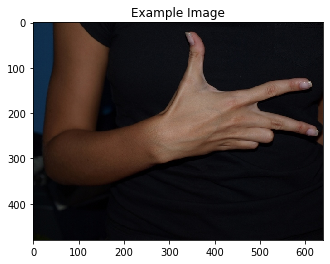

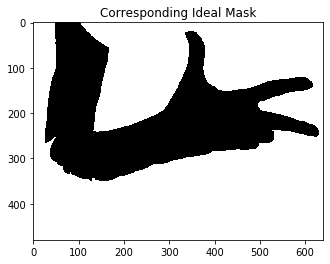

In [114]:
plt.title("Example Image")
plt.imshow(cv2.cvtColor(images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask")
plt.imshow(cv2.cvtColor(masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()

In [115]:
def skinDetection(image, mask, value = 255):
    mask_skin = mask != 0
    img = image.copy()
    img[mask_skin]= value
    return img

In [116]:
skin_images = {}
for key in images.keys():
    skin_images[key] = skinDetection(images[key], masks[key])

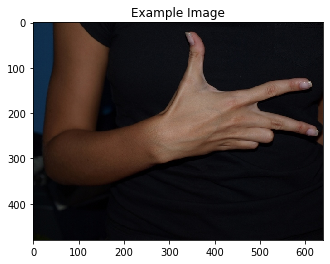

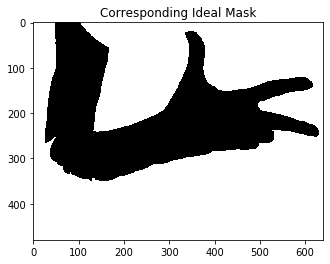

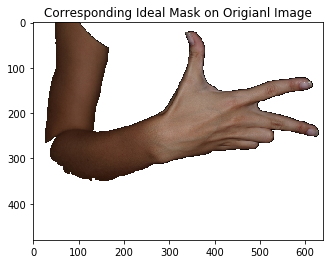

In [117]:
plt.title("Example Image")
plt.imshow(cv2.cvtColor(images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask")
plt.imshow(cv2.cvtColor(masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask on Origianl Image")
plt.imshow(cv2.cvtColor(skin_images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def histogramCharacterization(image, channels, min_value, max_value, bins):
    #TODO
    return histogram, bins

In [177]:
bins = 50
channels  = [2,3]
min_value = 0 
max_value = 255
bidimensional_histogram = []

In [179]:
for key in skin_images.keys():
    image = skin_images.copy()
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    histogram, bins_edge = histogramCharacterization(image, channels, min_value, max_value, bins)
    bidimensional_histogram += histogram

bidimensional_histogram /= len(skin_images)